In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn')
plt.rcParams['figure.figsize'] = [20, 7]

In [2]:
confirmed = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [3]:
deaths = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [4]:
recovered = pd.read_csv('CSSEGISandData/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [5]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,989,989,989,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,400,400,410,410,411,413,414,414,418,418
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,294,294,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,"Fort Bend County, TX",US,29.5693,-95.8143,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
169,"Grant County, WA",US,47.1981,-119.3732,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
170,"Queens County, NY",US,40.7282,-73.7949,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
171,"Santa Rosa County, FL",US,30.7690,-86.9824,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
confirmed2 = confirmed.copy()

In [7]:
confirmed.rename({'Province/State': 'province', 'Country/Region': 'country'}, axis=1, inplace=True)

In [8]:
recovered.rename({'Province/State': 'province', 'Country/Region': 'country'}, axis=1, inplace=True)

In [9]:
deaths.rename({'Province/State': 'province', 'Country/Region': 'country'}, axis=1, inplace=True)

In [10]:
confirmed[~confirmed['province'].isnull()].country.value_counts()

US                44
Mainland China    31
Australia          8
Canada             4
Taiwan             1
Hong Kong          1
Macau              1
Others             1
Name: country, dtype: int64

In [11]:
confirmed[confirmed['country']=='Hong Kong']

,province,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
39,Hong Kong,Hong Kong,22.3,114.2,0,2,2,5,8,8,...,84,91,92,94,95,96,100,100,105,105


In [12]:
confirmed[confirmed['country']=='Others']

,province,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
70,Diamond Princess cruise ship,Others,35.4437,139.638,0,0,0,0,0,0,...,691,705,705,705,705,705,705,706,706,706


In [13]:
confirmed.drop(['Lat', 'Long'], axis=1, inplace=True)

In [14]:
recovered.drop(['Lat', 'Long'], axis=1, inplace=True)

In [15]:
deaths.drop(['Lat', 'Long'], axis=1, inplace=True)

In [16]:
con = confirmed.groupby('country').sum()

In [17]:
rec = recovered.groupby('country').sum()

In [18]:
dea = deaths.groupby('country').sum()

In [19]:
con.loc['Italy']

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
1/27/20       0
1/28/20       0
1/29/20       0
1/30/20       0
1/31/20       2
2/1/20        2
2/2/20        2
2/3/20        2
2/4/20        2
2/5/20        2
2/6/20        2
2/7/20        3
2/8/20        3
2/9/20        3
2/10/20       3
2/11/20       3
2/12/20       3
2/13/20       3
2/14/20       3
2/15/20       3
2/16/20       3
2/17/20       3
2/18/20       3
2/19/20       3
2/20/20       3
2/21/20      20
2/22/20      62
2/23/20     155
2/24/20     229
2/25/20     322
2/26/20     453
2/27/20     655
2/28/20     888
2/29/20    1128
3/1/20     1694
3/2/20     2036
3/3/20     2502
3/4/20     3089
3/5/20     3858
Name: Italy, dtype: int64

In [20]:
con.loc['Switzerland']

1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0
1/27/20      0
1/28/20      0
1/29/20      0
1/30/20      0
1/31/20      0
2/1/20       0
2/2/20       0
2/3/20       0
2/4/20       0
2/5/20       0
2/6/20       0
2/7/20       0
2/8/20       0
2/9/20       0
2/10/20      0
2/11/20      0
2/12/20      0
2/13/20      0
2/14/20      0
2/15/20      0
2/16/20      0
2/17/20      0
2/18/20      0
2/19/20      0
2/20/20      0
2/21/20      0
2/22/20      0
2/23/20      0
2/24/20      0
2/25/20      1
2/26/20      1
2/27/20      8
2/28/20      8
2/29/20     18
3/1/20      27
3/2/20      42
3/3/20      56
3/4/20      90
3/5/20     114
Name: Switzerland, dtype: int64

In [21]:
con.sort_values('3/1/20', ascending=False).head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
country,,,,,,,,,,,,,,,,,,,,,
Mainland China,547,639,916,1399,2062,2863,5494,6070,8124,9783,...,77660,78065,78498,78824,79251,79826,80026,80151,80271,80422
South Korea,1,1,2,2,3,4,4,4,4,11,...,977,1261,1766,2337,3150,3736,4335,5186,5621,6088
Italy,0,0,0,0,0,0,0,0,0,2,...,322,453,655,888,1128,1694,2036,2502,3089,3858
Iran,0,0,0,0,0,0,0,0,0,0,...,95,139,245,388,593,978,1501,2336,2922,3513
Others,0,0,0,0,0,0,0,0,0,0,...,691,705,705,705,705,705,705,706,706,706
Japan,2,1,2,2,4,4,7,7,11,15,...,170,189,214,228,241,256,274,293,331,360
France,0,0,2,3,3,3,4,5,5,5,...,14,18,38,57,100,130,191,204,285,377
Germany,0,0,0,0,0,1,4,4,4,5,...,17,27,46,48,79,130,159,196,262,482
Singapore,0,1,3,3,4,5,7,7,10,13,...,91,93,93,93,102,106,108,110,110,117


In [22]:
pop = pd.read_csv('massaged_pop.csv')

In [23]:
pop

,country,2018
0,Aruba,105845.0
1,Afghanistan,37172386.0
2,Angola,30809762.0
3,Albania,2866376.0
4,Andorra,77006.0
...,...,...
259,South Africa,57779622.0
260,Zambia,17351822.0
261,Zimbabwe,14439018.0
262,Others,3000.0


## Check that we have every country we need

In [24]:
set(con.index) - set(pop.country) 

{'Palestine', 'Saint Barthelemy'}

In [25]:
pop.set_index('country', inplace=True)

## Remove contries from pop which are not in the table

In [26]:
pop = pop[pop.index.isin(con.index)]

In [27]:
(con.div(pop['2018'], axis=0)*100000).sort_values('3/1/20', ascending=False).head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
country,,,,,,,,,,,,,,,,,,,,,
Others,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23033.333333,23500.000000,23500.000000,23500.000000,23500.000000,23500.000000,23500.000000,23533.333333,23533.333333,23533.333333
South Korea,0.001937,0.001937,0.003873,0.003873,0.005810,0.007747,0.007747,0.007747,0.007747,0.021303,...,1.892118,2.442130,3.420144,4.525977,6.100483,7.235366,8.395427,10.043525,10.885973,11.790394
Mainland China,0.039275,0.045881,0.065770,0.100450,0.148055,0.205567,0.394477,0.435835,0.583315,0.702433,...,5.576099,5.605178,5.636268,5.659676,5.690335,5.731621,5.745981,5.754956,5.763572,5.774414
Bahrain,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.465492,2.102662,2.102662,2.293813,2.612398,2.994701,3.122135,3.122135,3.313286,3.504437
San Marino,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.959893,2.959893,2.959893,2.959893,23.679148,29.598934,47.358295,62.157762
Italy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003310,...,0.532837,0.749612,1.083876,1.469438,1.866583,2.803184,3.369116,4.140240,5.111591,6.384111
Monaco,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.585182,2.585182,2.585182,2.585182,2.585182,2.585182
Singapore,0.000000,0.017735,0.053204,0.053204,0.070939,0.088673,0.124143,0.124143,0.177347,0.230551,...,1.613854,1.649323,1.649323,1.649323,1.808935,1.879874,1.915343,1.950813,1.950813,2.074955
Macau,0.158319,0.316638,0.316638,0.316638,0.791595,0.949914,1.108233,1.108233,1.108233,1.108233,...,1.583190,1.583190,1.583190,1.583190,1.583190,1.583190,1.583190,1.583190,1.583190,1.583190


## check only countries with 20 occurances

In [28]:
con10 = con[con['3/3/20'] >= 20]

## drop others

In [29]:
con10 = con10[~con10.index.str.contains('Others')]

In [30]:
(con10.div(pop['2018'], axis=0)*100000).sort_values('3/1/20', ascending=False).head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20
country,,,,,,,,,,,,,,,,,,,,,
South Korea,0.001937,0.001937,0.003873,0.003873,0.005810,0.007747,0.007747,0.007747,0.007747,0.021303,...,1.892118,2.442130,3.420144,4.525977,6.100483,7.235366,8.395427,10.043525,10.885973,11.790394
Mainland China,0.039275,0.045881,0.065770,0.100450,0.148055,0.205567,0.394477,0.435835,0.583315,0.702433,...,5.576099,5.605178,5.636268,5.659676,5.690335,5.731621,5.745981,5.754956,5.763572,5.774414
Bahrain,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.465492,2.102662,2.102662,2.293813,2.612398,2.994701,3.122135,3.122135,3.313286,3.504437
Italy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003310,...,0.532837,0.749612,1.083876,1.469438,1.866583,2.803184,3.369116,4.140240,5.111591,6.384111
Singapore,0.000000,0.017735,0.053204,0.053204,0.070939,0.088673,0.124143,0.124143,0.177347,0.230551,...,1.613854,1.649323,1.649323,1.649323,1.808935,1.879874,1.915343,1.950813,1.950813,2.074955
Hong Kong,0.000000,0.026842,0.026842,0.067105,0.107368,0.107368,0.107368,0.134210,0.134210,0.161052,...,1.127365,1.221313,1.234734,1.261576,1.274997,1.288418,1.342102,1.342102,1.409207,1.409207
Iran,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.116137,0.169926,0.299510,0.474326,0.724936,1.195595,1.834957,2.855736,3.572115,4.294607
Kuwait,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.265873,0.628428,1.039323,1.087664,1.087664,1.087664,1.353537,1.353537,1.353537,1.401877
Norway,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.018817,0.018817,0.112902,0.282255,0.357523,0.470426,0.602145,1.053753,1.637081


In [31]:
popratio = (con10.div(pop['2018'], axis=0)*100000).sort_values('3/1/20', ascending=False)

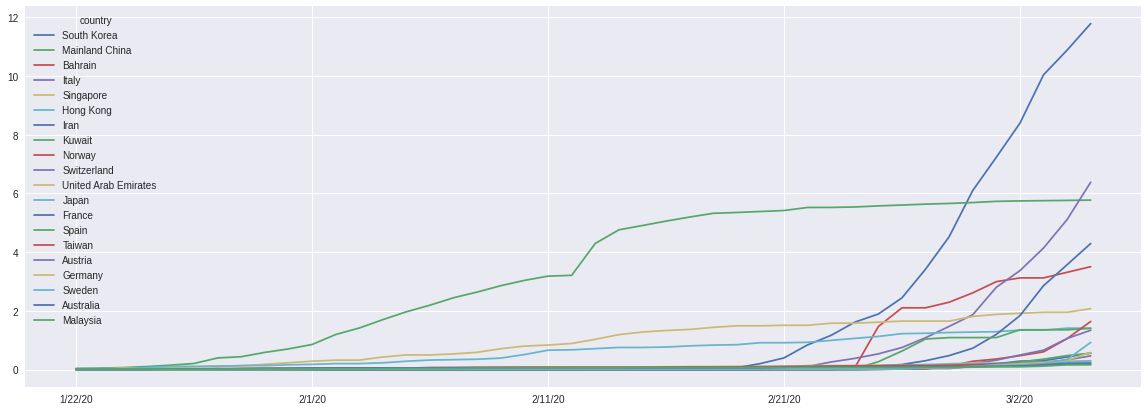

In [32]:
popratio.head(20).T.plot()

In [33]:
type(popratio.columns[0])

str

In [35]:
con.loc['Switzerland']

1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0
1/27/20      0
1/28/20      0
1/29/20      0
1/30/20      0
1/31/20      0
2/1/20       0
2/2/20       0
2/3/20       0
2/4/20       0
2/5/20       0
2/6/20       0
2/7/20       0
2/8/20       0
2/9/20       0
2/10/20      0
2/11/20      0
2/12/20      0
2/13/20      0
2/14/20      0
2/15/20      0
2/16/20      0
2/17/20      0
2/18/20      0
2/19/20      0
2/20/20      0
2/21/20      0
2/22/20      0
2/23/20      0
2/24/20      0
2/25/20      1
2/26/20      1
2/27/20      8
2/28/20      8
2/29/20     18
3/1/20      27
3/2/20      42
3/3/20      56
3/4/20      90
3/5/20     114
Name: Switzerland, dtype: int64

In [37]:
con.loc['Italy']

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
1/27/20       0
1/28/20       0
1/29/20       0
1/30/20       0
1/31/20       2
2/1/20        2
2/2/20        2
2/3/20        2
2/4/20        2
2/5/20        2
2/6/20        2
2/7/20        3
2/8/20        3
2/9/20        3
2/10/20       3
2/11/20       3
2/12/20       3
2/13/20       3
2/14/20       3
2/15/20       3
2/16/20       3
2/17/20       3
2/18/20       3
2/19/20       3
2/20/20       3
2/21/20      20
2/22/20      62
2/23/20     155
2/24/20     229
2/25/20     322
2/26/20     453
2/27/20     655
2/28/20     888
2/29/20    1128
3/1/20     1694
3/2/20     2036
3/3/20     2502
3/4/20     3089
3/5/20     3858
Name: Italy, dtype: int64

In [38]:
pop.loc['Hong Kong']

2018    7451000.0
Name: Hong Kong, dtype: float64

In [39]:
pop.loc['Italy']

2018    60431283.0
Name: Italy, dtype: float64

In [40]:
dea.loc['Italy']

1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0
1/27/20      0
1/28/20      0
1/29/20      0
1/30/20      0
1/31/20      0
2/1/20       0
2/2/20       0
2/3/20       0
2/4/20       0
2/5/20       0
2/6/20       0
2/7/20       0
2/8/20       0
2/9/20       0
2/10/20      0
2/11/20      0
2/12/20      0
2/13/20      0
2/14/20      0
2/15/20      0
2/16/20      0
2/17/20      0
2/18/20      0
2/19/20      0
2/20/20      0
2/21/20      1
2/22/20      2
2/23/20      3
2/24/20      7
2/25/20     10
2/26/20     12
2/27/20     17
2/28/20     21
2/29/20     29
3/1/20      34
3/2/20      52
3/3/20      79
3/4/20     107
3/5/20     148
Name: Italy, dtype: int64

In [41]:
dea.loc['Switzerland']

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
1/27/20    0
1/28/20    0
1/29/20    0
1/30/20    0
1/31/20    0
2/1/20     0
2/2/20     0
2/3/20     0
2/4/20     0
2/5/20     0
2/6/20     0
2/7/20     0
2/8/20     0
2/9/20     0
2/10/20    0
2/11/20    0
2/12/20    0
2/13/20    0
2/14/20    0
2/15/20    0
2/16/20    0
2/17/20    0
2/18/20    0
2/19/20    0
2/20/20    0
2/21/20    0
2/22/20    0
2/23/20    0
2/24/20    0
2/25/20    0
2/26/20    0
2/27/20    0
2/28/20    0
2/29/20    0
3/1/20     0
3/2/20     0
3/3/20     0
3/4/20     0
3/5/20     1
Name: Switzerland, dtype: int64

In [42]:
con.loc['South Korea']

1/22/20       1
1/23/20       1
1/24/20       2
1/25/20       2
1/26/20       3
1/27/20       4
1/28/20       4
1/29/20       4
1/30/20       4
1/31/20      11
2/1/20       12
2/2/20       15
2/3/20       15
2/4/20       16
2/5/20       19
2/6/20       23
2/7/20       24
2/8/20       24
2/9/20       25
2/10/20      27
2/11/20      28
2/12/20      28
2/13/20      28
2/14/20      28
2/15/20      28
2/16/20      29
2/17/20      30
2/18/20      31
2/19/20      31
2/20/20     104
2/21/20     204
2/22/20     433
2/23/20     602
2/24/20     833
2/25/20     977
2/26/20    1261
2/27/20    1766
2/28/20    2337
2/29/20    3150
3/1/20     3736
3/2/20     4335
3/3/20     5186
3/4/20     5621
3/5/20     6088
Name: South Korea, dtype: int64

In [43]:
dea.loc['South Korea']

1/22/20     0
1/23/20     0
1/24/20     0
1/25/20     0
1/26/20     0
1/27/20     0
1/28/20     0
1/29/20     0
1/30/20     0
1/31/20     0
2/1/20      0
2/2/20      0
2/3/20      0
2/4/20      0
2/5/20      0
2/6/20      0
2/7/20      0
2/8/20      0
2/9/20      0
2/10/20     0
2/11/20     0
2/12/20     0
2/13/20     0
2/14/20     0
2/15/20     0
2/16/20     0
2/17/20     0
2/18/20     0
2/19/20     0
2/20/20     1
2/21/20     2
2/22/20     2
2/23/20     6
2/24/20     8
2/25/20    10
2/26/20    12
2/27/20    13
2/28/20    13
2/29/20    16
3/1/20     17
3/2/20     28
3/3/20     28
3/4/20     35
3/5/20     35
Name: South Korea, dtype: int64